In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import inspect

# Hämta data från databasen

# Load credentials from environment variables
username = "sa"
password = "123"
server = "localhost"
database = "AdventureWorks2022"

# Define the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

    # Create an engine
engine = create_engine(connection_string)

# Create an inspector
inspector = inspect(engine)

# Get the list of all table names
table_names = inspector.get_table_names()
print (table_names)

sql_df = pd.read_sql( 
    "SELECT * FROM Person.Person", 
    con=engine 
)

print (sql_df.head())

['AWBuildVersion', 'DatabaseLog', 'ErrorLog']
   BusinessEntityID PersonType  NameStyle Title FirstName MiddleName  \
0                 1         EM      False  None       Ken          J   
1                 2         EM      False  None     Terri        Lee   
2                 3         EM      False  None   Roberto       None   
3                 4         EM      False  None       Rob       None   
4                 5         EM      False   Ms.      Gail          A   

     LastName Suffix  EmailPromotion AdditionalContactInfo  \
0     Sánchez   None               0                  None   
1       Duffy   None               1                  None   
2  Tamburello   None               0                  None   
3     Walters   None               0                  None   
4    Erickson   None               0                  None   

                                        Demographics  \
0  <IndividualSurvey xmlns="http://schemas.micros...   
1  <IndividualSurvey xmlns="http://s

Table: Person
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19972 entries, 0 to 19971
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   BusinessEntityID       19972 non-null  int64         
 1   PersonType             19972 non-null  object        
 2   NameStyle              19972 non-null  bool          
 3   Title                  1009 non-null   object        
 4   FirstName              19972 non-null  object        
 5   MiddleName             11473 non-null  object        
 6   LastName               19972 non-null  object        
 7   Suffix                 53 non-null     object        
 8   EmailPromotion         19972 non-null  int64         
 9   AdditionalContactInfo  10 non-null     object        
 10  Demographics           19972 non-null  object        
 11  rowguid                19972 non-null  object        
 12  ModifiedDate           19972 non-null  datetim

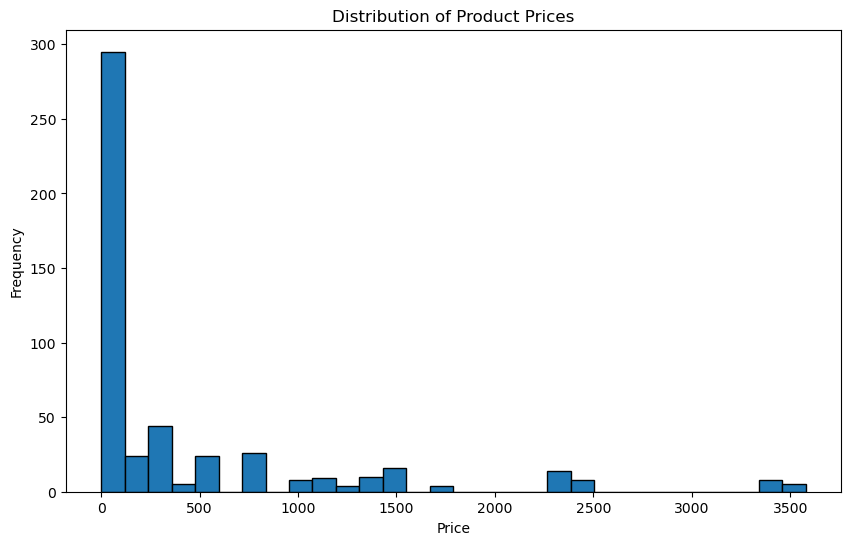

In [20]:
tables_to_query = {
    'Person': 'SELECT * FROM Person.Person',
    'Product': 'SELECT * FROM Production.Product',
    'SalesOrderHeader': 'SELECT * FROM Sales.SalesOrderHeader',
    'SalesOrderDetail': 'SELECT * FROM Sales.SalesOrderDetail'
}

# Load each table into a DataFrame
dataframes = {name: pd.read_sql(query, engine) for name, query in tables_to_query.items()}

# Display basic info
for table_name, df in dataframes.items():
    print(f"Table: {table_name}")
    print(df.info())
    print(df.head())
    print("\n")

# Visualization: Distribution of product prices
import matplotlib.pyplot as plt

product_df = dataframes['Product']
plt.figure(figsize=(10, 6))
plt.hist(product_df['ListPrice'], bins=30, edgecolor='k')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [21]:
import scipy.stats as stats

# Calculate mean and confidence interval for product prices
product_prices = product_df['ListPrice']
mean_price = product_prices.mean()
std_price = product_prices.std()
confidence_level = 0.95
degrees_freedom = len(product_prices) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_price, std_price / (len(product_prices) ** 0.5))

print(f"Mean Product Price: {mean_price}")
print(f"95% Confidence Interval for the Mean Product Price: {confidence_interval}")


Mean Product Price: 438.66625000000005
95% Confidence Interval for the Mean Product Price: (370.96493037210354, 506.36756962789656)
